Cargar los recursos

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


Cargar datos

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 50% 10.0M/20.1M [00:00<00:00, 32.4MB/s]
100% 20.1M/20.1M [00:00<00:00, 61.1MB/s]


In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


In [6]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 12)


In [7]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Exploración de datos

<Axes: xlabel='RENDIMIENTO_GLOBAL'>

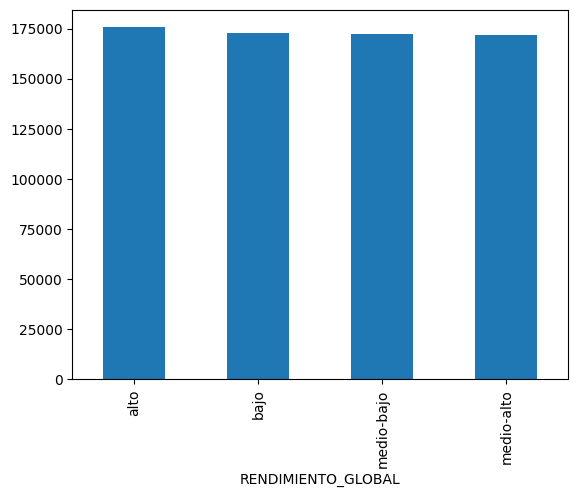

In [16]:
##Distribucion del rendimiento global##
z.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')

In [22]:
##cuantos estudiantes hay por programa academico##
estudiantes_program = z.groupby('ESTU_PRGM_ACADEMICO').size()
estudiantes_program

,0
ESTU_PRGM_ACADEMICO,
3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,69
ACTIVIDAD FISICA Y DEPORTE,162
ACUICULTURA,79
ADMINISTRACION,117
ADMINISTRACION FINANCIERA,74
...,...
TRABAJO SOCIAL,12686
TRADUCCION INGLES-FRANCES-ESPAÑOL,68
TURISMO,222


<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

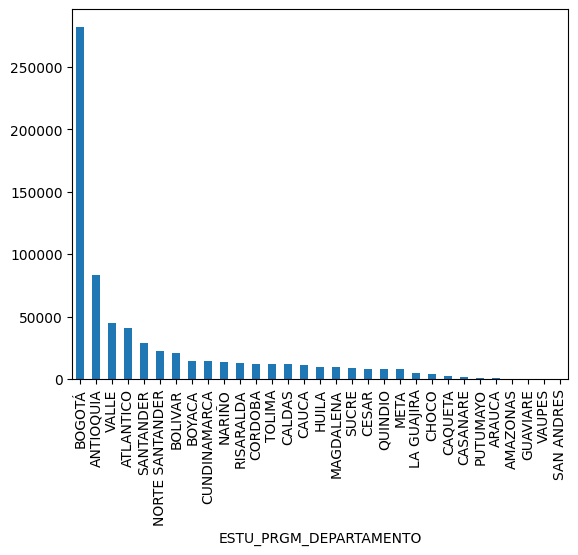

In [14]:
##Cuantos estudiantes hay por departamento##
z.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

La mayoria de estudiantes se encuentran en la capital

In [30]:
from rlxutils import subplots
import matplotlib.pyplot as plt

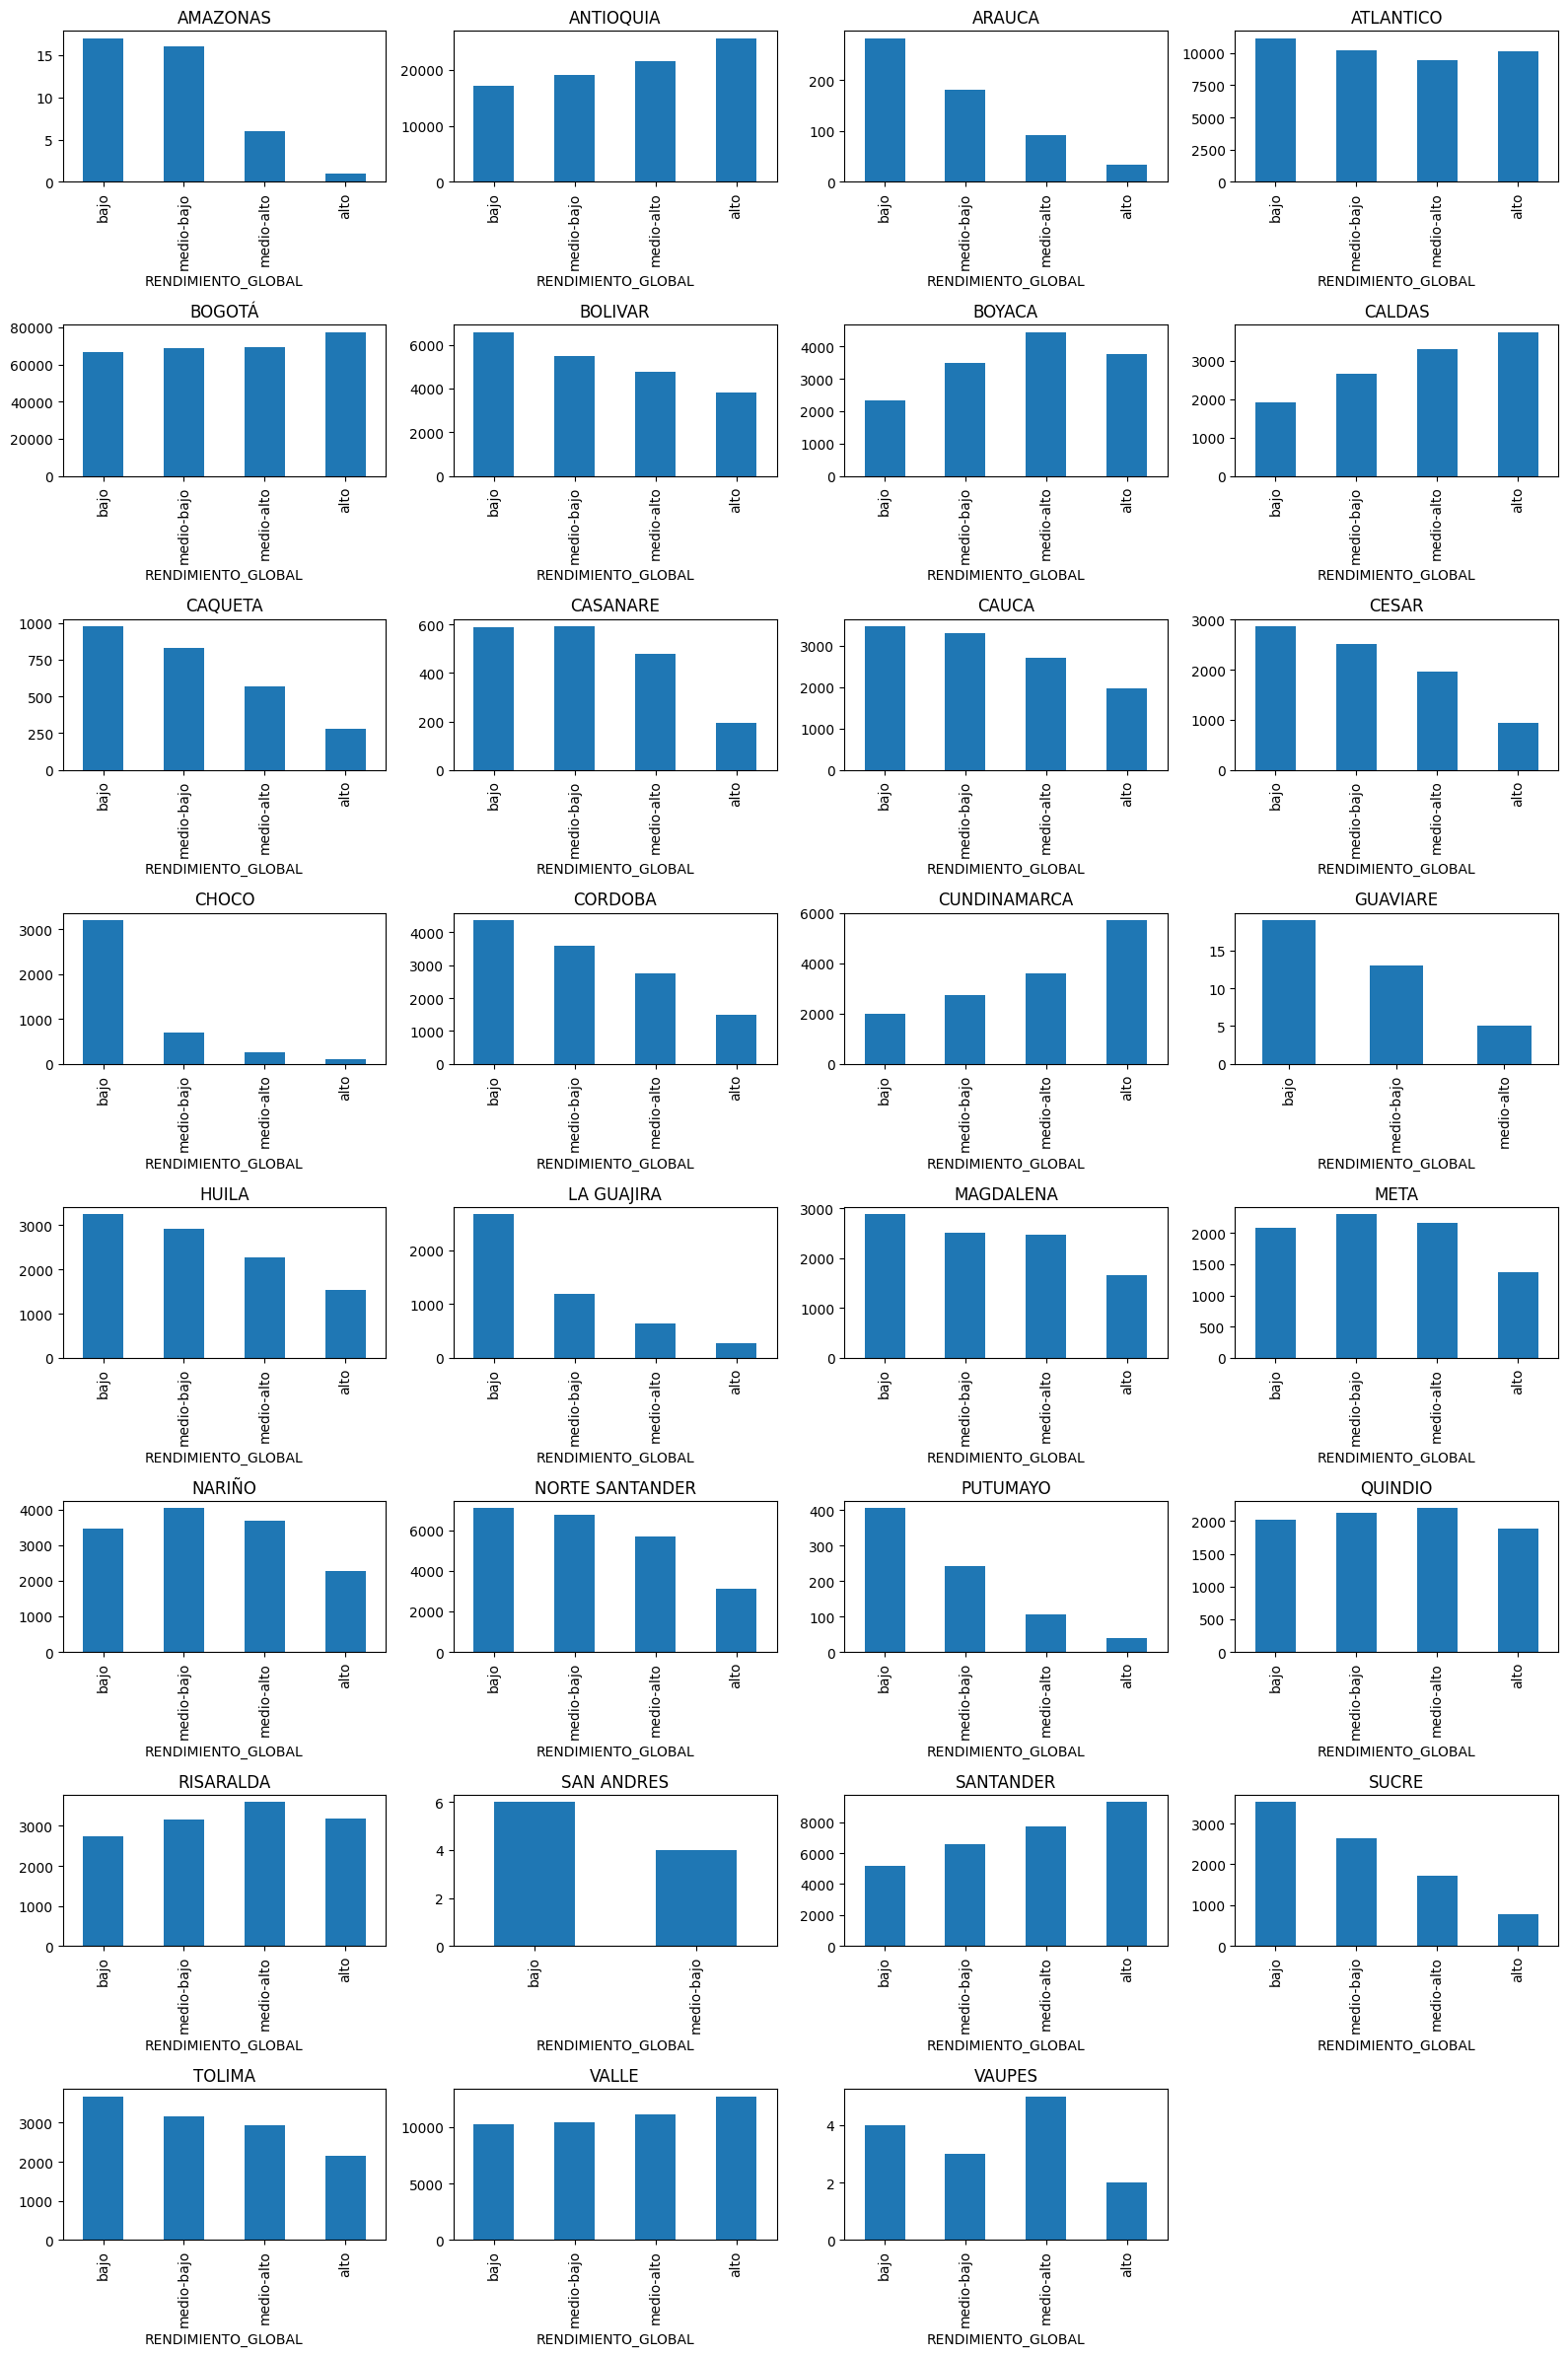

In [31]:
##Comparar relacion del departamento de los estudiantes con su rendimiento global##
c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]

    counts = zc.RENDIMIENTO_GLOBAL.value_counts()

    required_values = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
    existing_values = [val for val in required_values if val in counts.index]

    counts[existing_values].plot(kind='bar', ax=ax)

    ax.set_title(ci)

plt.tight_layout()
plt.show()

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

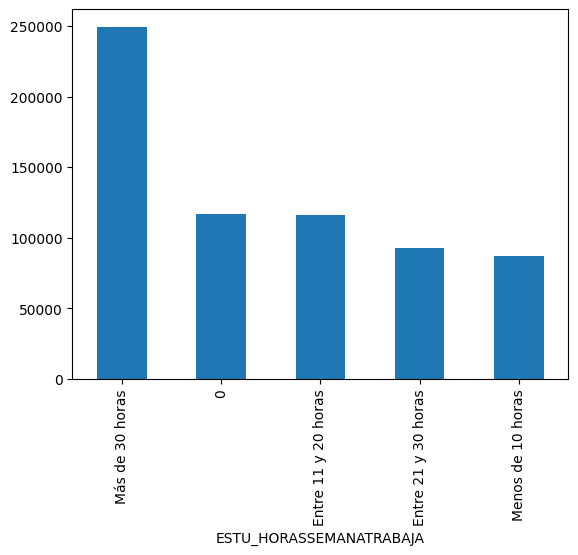

In [32]:
##Estudiantes que trabajan##
z.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

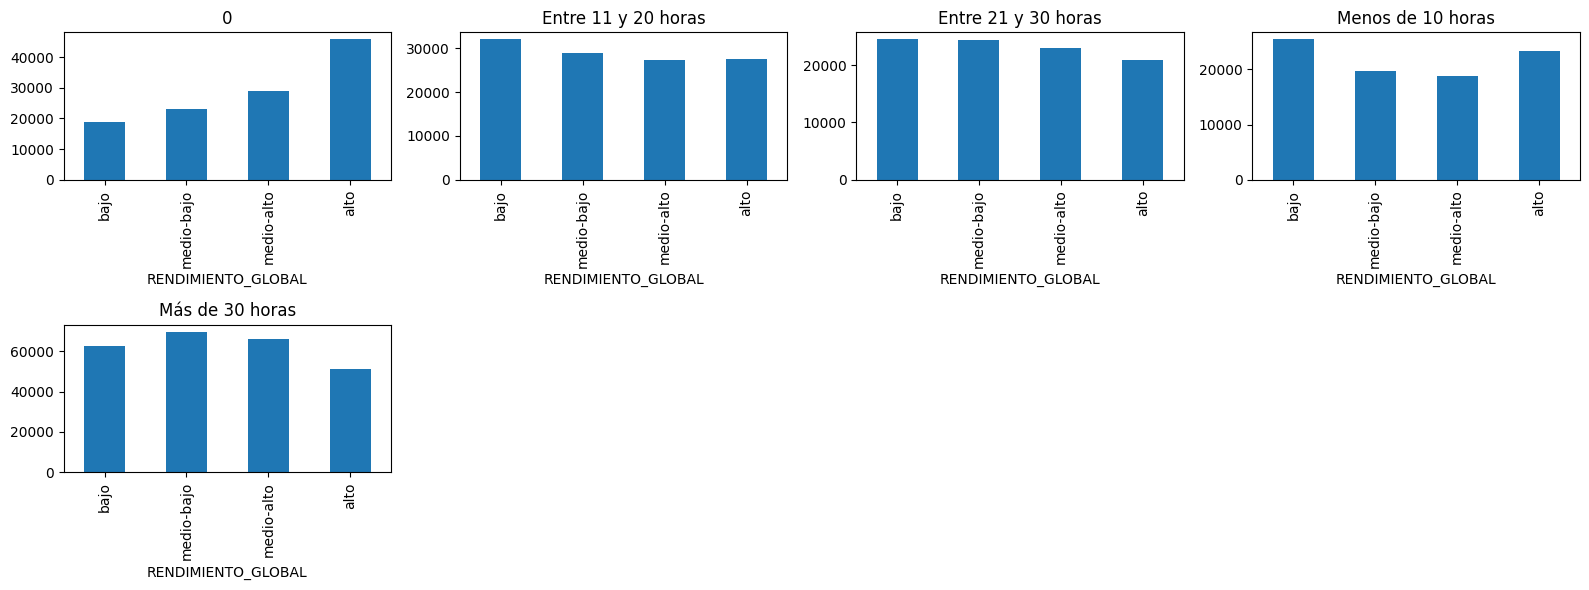

In [33]:
c = sorted(z.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

Se puede concluir que los estudiantes que no trabajan tiene un mayor rendimiento global a comparacion de los estudiantes que si trabajan

In [29]:
##Numero de estudiantes por estrato##
estudiantes_estrato = z.groupby('FAMI_ESTRATOVIVIENDA').size()
estudiantes_estrato

,0
FAMI_ESTRATOVIVIENDA,
Estrato 1,111991
Estrato 2,232671
Estrato 3,210685
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [28]:
##Numero de estudiantes que pagaron su matricula##
estudiantes_pagomatr = z.groupby('ESTU_PAGOMATRICULAPROPIO').size()
estudiantes_pagomatr

,0
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801


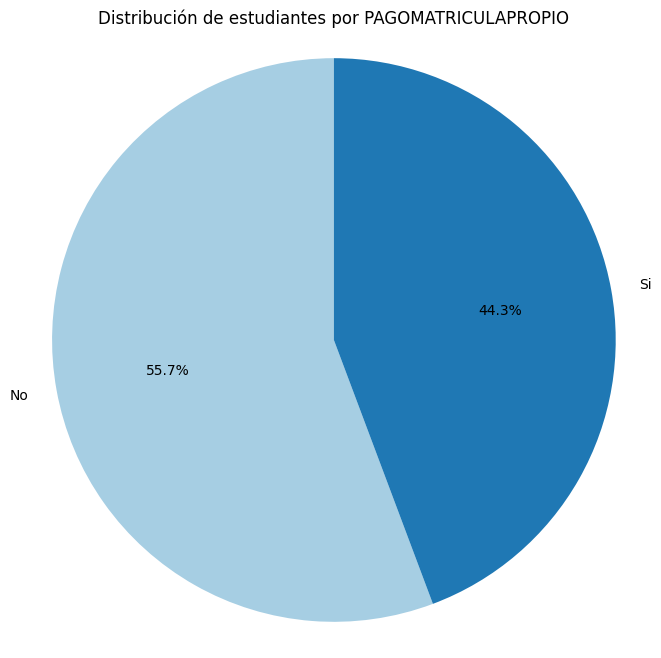

In [35]:
plt.figure(figsize=(8,8))
plt.pie(estudiantes_pagomatr, labels=estudiantes_pagomatr.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Distribución de estudiantes por PAGOMATRICULAPROPIO')

plt.axis('equal')

plt.show()